<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/149481_CSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **CALVINCE ONYANGO**


> **REG NO- 149481**



> **MENTAL HEALTH IN TECH**



> **CSA- CAT**







**Data Understanding**

The datasset was conducted in a Multi-National tech Organization to examine staff attitude towards mental health and the frequency with which it occurs accross different geographical areas

**Data variables**

1. Socio-Demographic Variables (Timestamp, Age, Gender, Country, State)
2. self_employed : Are you self-employed?
3. self_employed : Are you self-employed?
4. family_history : Do you have a family history of mental illness?
5. treatment : Have you sought treatment for a mental health condition?
6. work_interfere : If you have a mental health condition, do you feel that it interferes with your work?
7. no_employees : How many employees does your company or organization have?
8. remote_work : Do you work remotely (outside of an office) at least 50% of the time?
9. ech_company : Is your employer primarily a tech company/organization?
10. benefits : Does your employer provide mental health benefits?
11. care_options : Do you know the options for mental health care your employer provides?
12. wellness_program : Has your employer ever discussed mental health as part of an employee wellness program?
13. seek_help : Does your employer provide resources to learn more about mental health issues and how to seek help?
14. anonymity : Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
15. leave : How easy is it for you to take medical leave for a mental health condition?
16. mental_health_consequence : Do you think that discussing a mental health issue with your employer would have negative consequences?
17. phys_health_consequence : Do you think that discussing a physical health issue with your employer would have negative consequences?
18. coworkers : Would you be willing to discuss a mental health issue with your coworkers?
19. supervisor : Would you be willing to discuss a mental health issue with your direct supervisor(s)?
20. mental_health_interview : Would you bring up a mental health issue with a potential employer in an interview?
21. phys_health_interview : Would you bring up a physical health issue with a potential employer in an interview?
22. mental_vs_physical : Do you feel that your employer takes mental health as seriously as physical health?
23. obs_consequence : Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
24. comments : Any additional notes or comments




**Research Objectives**


In [1]:
# Data Imporattion library
import pandas as pd
import numpy as np

# Libraries to perform statistical analysis
import scipy.stats as stats
import sklearn
from numpy import std
from statistics import mean

# Sklearn Modules for Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.feature_selection import mutual_info_regression


In [2]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', None)

In [3]:
data = "https://raw.githubusercontent.com/Calvince1/Cal/main/Mental%20health%20Disorder.csv"
df = pd.read_csv(data)
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27/08/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27/08/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27/08/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27/08/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27/08/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,27/08/2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,Jun-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,27/08/2014 11:31,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,01-May,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,27/08/2014 11:32,39,M,Canada,NaN,NaN,No,No,Never,01-May,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,27/08/2014 11:32,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,27/08/2014 11:32,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


**Data Understanding & Evaluation**

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [6]:
df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,884,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,27/08/2014 12:31,NaN,Male,United States,CA,No,No,Yes,Sometimes,Jun-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

In [7]:
# Check and Count The Number of Missing Value Before Cleansing
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
# Check The Boolean of Missing Value Before Cleansing
df.isna().any()

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
comments                      True
dtype: bool

In [8]:
 #droping columns not useful in my EDA
Df = df.drop(columns=['state', 'comments', 'Timestamp', ])

In [9]:
#Replacing Missing values
# Fill in missing values in work_interfere column
Df['work_interfere'] = SimpleImputer(missing_values=np.NaN,strategy = 'most_frequent') \
                        .fit_transform(df['work_interfere'].values.reshape(-1,1))[:,0]

Df['self_employed'] = SimpleImputer(missing_values=np.NaN,strategy = 'most_frequent') \
                        .fit_transform(df['self_employed'].values.reshape(-1,1))[:,0]

Df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,Jun-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,Jun-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [10]:
# Check and Count The Number of Missing Value After Cleansing
Df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [11]:
#Checking for Data Uniqness
print('Self Employed',Df['self_employed'].unique())


Self Employed ['No' 'Yes']


In [12]:
#Checking counts in Treatment
Df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [13]:
#Checking for Data Uniqness
print('%s%s' % (Df["Gender"].nunique(), ' Data Record' ))
print('Gender',Df['Gender'].unique())


49 Data Record
Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [14]:
# Cleaning and regruping of the Gender Attribute
clean_gender = {
    'Male ': 'Male',
    'male': 'Male',
    'M': 'Male',
    'm': 'Male',
    'Male': 'Male',
    'Cis Male': 'Male',
    'Man': 'Male',
    'cis male': 'Male',
    'Mail': 'Male',
    'Male-ish': 'Male',
    'Male (CIS)': 'Male',
    'Cis Man': 'Male',
     'msle': 'Male',
    'Malr': 'Male',
    'Mal': 'Male',
    'maile': 'Male',
    'Make': 'Male',
    'Female ': 'Female',
    'female': 'Female',
    'F': 'Female',
    'f': 'Female',
    'Woman': 'Female',
    'Female': 'Female',
    'femail': 'Female',
    'Cis Female': 'Female',
    'cis-female/femme': 'Female',
    'Femake': 'Female',
    'Female (cis)': 'Female',
    'woman': 'Female',
    'Female (trans)': 'Other',
    'queer/she/they': 'Other',
    'non-binary': 'Other',
    'fluid': 'Other',
    'queer': 'Other',
    'Androgyne': 'Other',
    'Trans-female': 'Other',
    'male leaning androgynous': 'Other',
    'Agender': 'Other',
     'A little about you': 'Other',
    'Nah': 'Other',
    'All': 'Other',
    'ostensibly male, unsure what that really means': 'Other',
    'Genderqueer': 'Other',
    'Enby': 'Other',
    'p': 'Other',
    'Neuter': 'Other',
    'something kinda male?': 'Other',
    'Guy (-ish) ^_^': 'Other',
    'Trans woman': 'Other'
}

Df['Gender'].replace(clean_gender, inplace=True)
print('%s%s' % (Df["Gender"].nunique(), ' Data Record' ))
print(Df['Gender'].unique())

3 Data Record
['Female' 'Male' 'Other']


In [15]:
# Cleaning and regruping of the Gender Attribute Rubric
clean_gender = {
    'Male ': 'Male','male': 'Male','M': 'Male','m': 'Male','Male': 'Male','Cis Male': 'Male','Man': 'Male','cis male': 'Male','Mail': 'Male','Male-ish': 'Male','Male (CIS)': 'Male',
    'Cis Man': 'Male','msle': 'Male','Malr': 'Male','Mal': 'Male','maile': 'Male','Make': 'Male','Female ': 'Female','female': 'Female','F': 'Female','f': 'Female','Woman': 'Female',
    'Female': 'Female','femail': 'Female','Cis Female': 'Female','cis-female/femme': 'Female','Femake': 'Female','Female (cis)': 'Female','woman': 'Female','Female (trans)': 'Other',
    'queer/she/they': 'Other','non-binary': 'Other','fluid': 'Other','queer': 'Other','Androgyne': 'Other','Trans-female': 'Other','male leaning androgynous': 'Other','Agender': 'Other',
     'A little about you': 'Other','Nah': 'Other','All': 'Other','ostensibly male, unsure what that really means': 'Other','Genderqueer': 'Other','Enby': 'Other','p': 'Other',
    'Neuter': 'Other','something kinda male?': 'Other','Guy (-ish) ^_^': 'Other','Trans woman': 'Other'
}
Df['Gender'].replace(clean_gender, inplace=True)
print('%s%s' % (Df["Gender"].nunique(), ' Data Record' ))
print(Df['Gender'].unique())

3 Data Record
['Female' 'Male' 'Other']


In [16]:
# Checking for unique values in age
Df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

From the above display, there are negative ages and outliers that needs to be fixed. I shall replace these by the median age

In [17]:
# Median age
median_age = Df['Age'].median()
print('The Median age is: ', median_age)

The Median age is:  31.0


In [18]:
# The minimum age of employment is on average 15, I will replace ages below 15 amd those above 100 by the median age
Df['Age'].replace([Df['Age'][Df['Age'] < 15]], median_age, inplace = True)
Df['Age'].replace([Df['Age'][Df['Age'] > 100]], median_age, inplace = True)

Df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [19]:
#Checking and Eliminating duplicates
duplicates = Df.duplicated().sum()
duplicates

4

In [20]:
#Eliminating Duplicates
Df.drop_duplicates(inplace= True)
duplicates = Df.duplicated().sum()
duplicates

0

**DATA EXPLORATION**

In [24]:
# Libraries to perform statistical analysis
import scipy.stats as stats
import sklearn

# statemodels
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

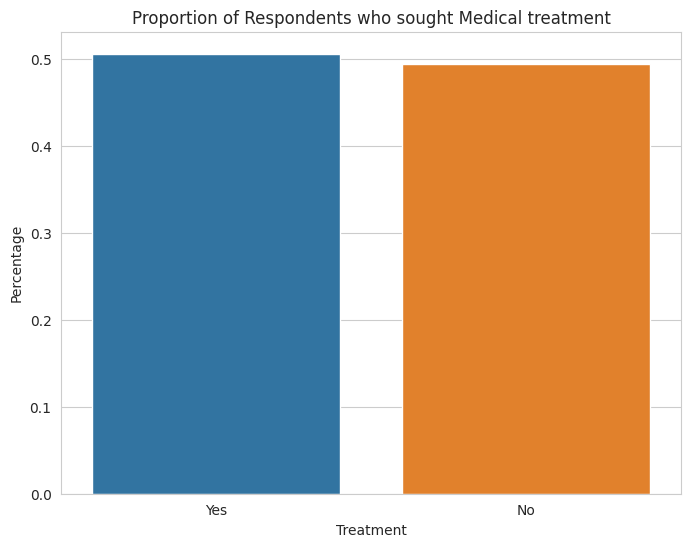

In [27]:
# Did the Staff seek medical treatment?
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_percentage = Df['treatment'].value_counts(normalize = True).rename_axis('Treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'Treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Proportion of Respondents who sought Medical treatment')
plt.show()

<ipython-input-29-d5844bb5b91c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['Age'], label = 'Skewness : %.2f'%(Df['Age'].skew()))


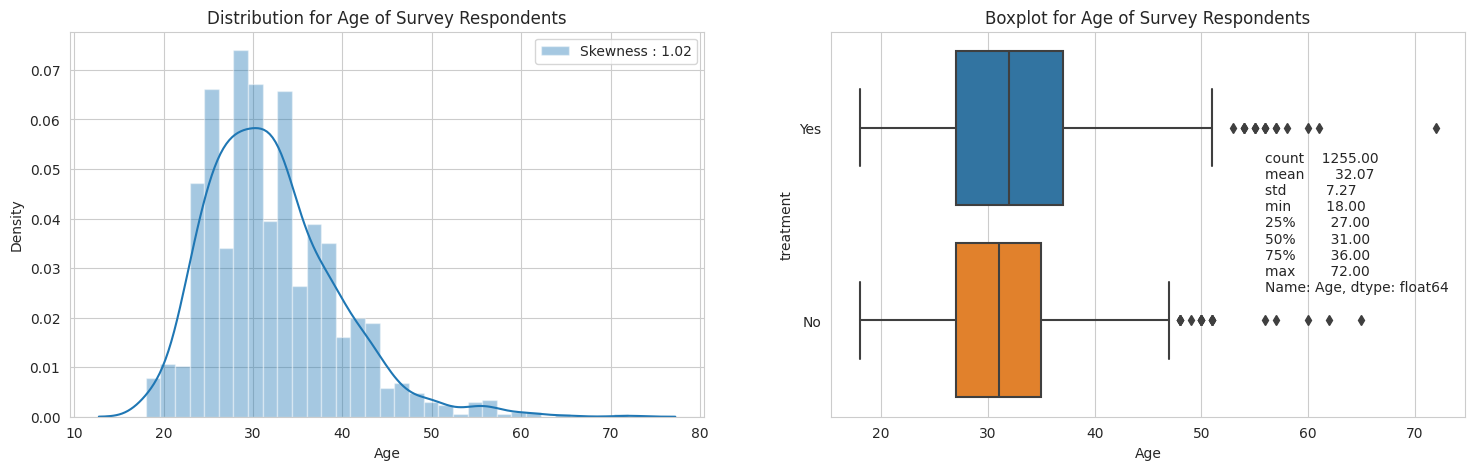

In [29]:
# Socio-demographics
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(Df['Age'], label = 'Skewness : %.2f'%(Df['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "treatment", data = Df)
plt.title('Boxplot for Age of Survey Respondents')
age = str(Df['Age'].describe().round(2))
plt.text(56, 0.85, age)
plt.show()

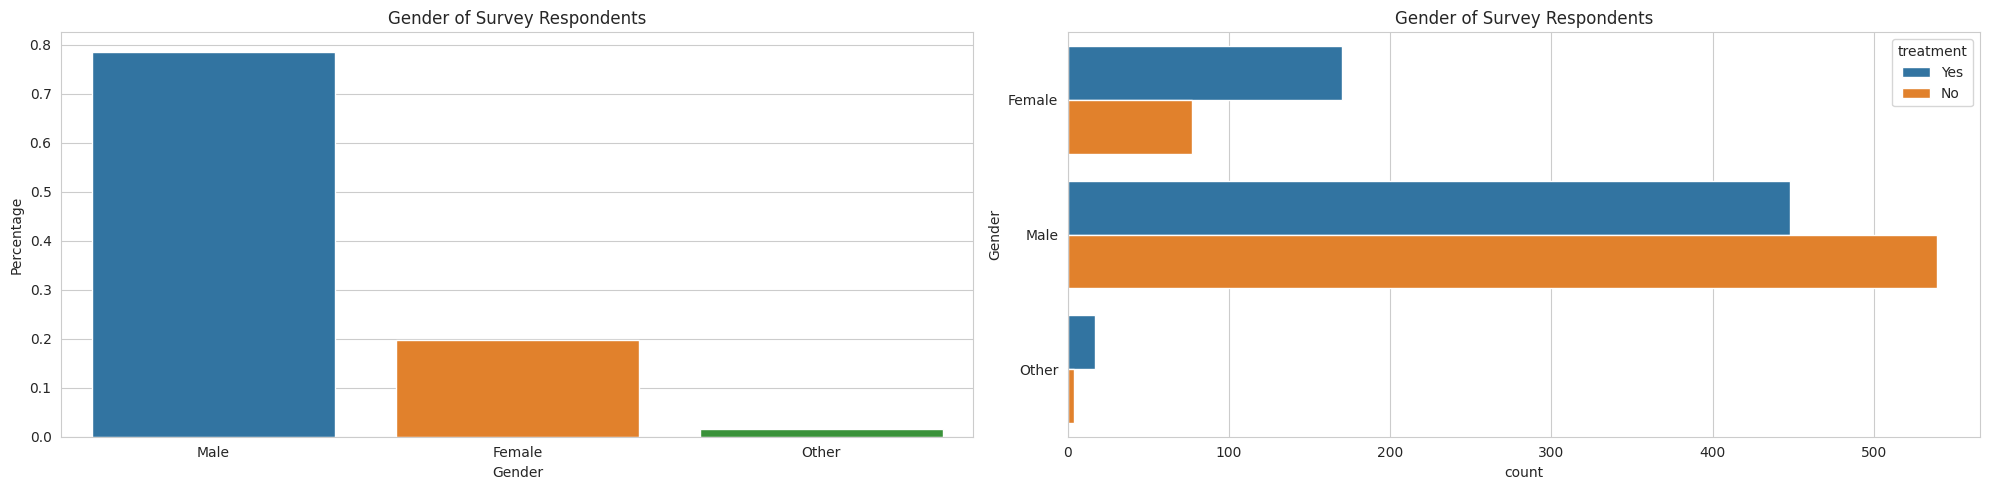

In [30]:
# Chart for Gender
plt.figure(figsize = (20, 5))

# Bar plot for Gender distribution
plt.subplot(1, 2, 1)
eda_percentage = Df['Gender'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data=eda_percentage.head(10))
plt.title('Gender of Survey Respondents')

# Count plot for Gender with hue by Treatment
plt.subplot(1, 2, 2)
sns.countplot(y = Df['Gender'], hue=Df['treatment'])
plt.title('Gender of Survey Respondents')

plt.tight_layout()
plt.show()

In [32]:
Df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

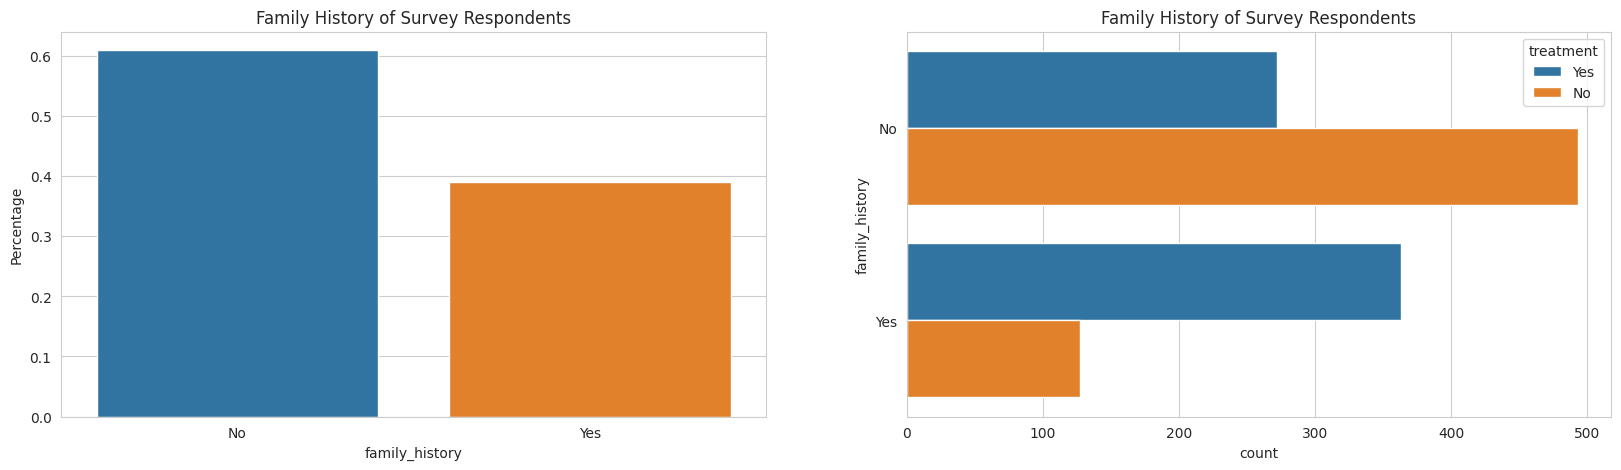

In [35]:
# Chart for Family History
plt.figure(figsize = (20,5))

# Bar plot for Family History distribution
plt.subplot(1,2,1)
eda_percentage = Df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage)
plt.title('Family History of Survey Respondents')

# Count plot for Family History with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(y = Df['family_history'], hue = Df['treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

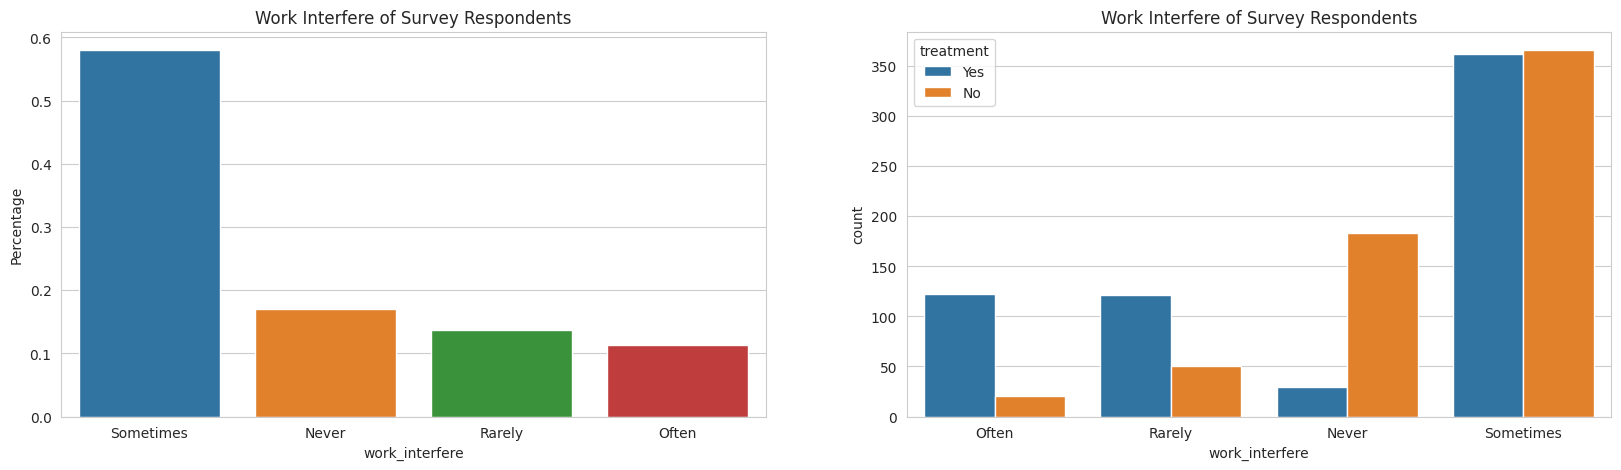

In [38]:
# Chart for Work Interference (of mental health)
plt.figure(figsize = (20,5))

# Bar plot for Work Interference distribution
plt.subplot(1,2,1)
eda_percentage = Df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage)
plt.title('Work Interfere of Survey Respondents')

# Count plot for Work Interference with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(x = Df['work_interfere'], hue = Df['treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

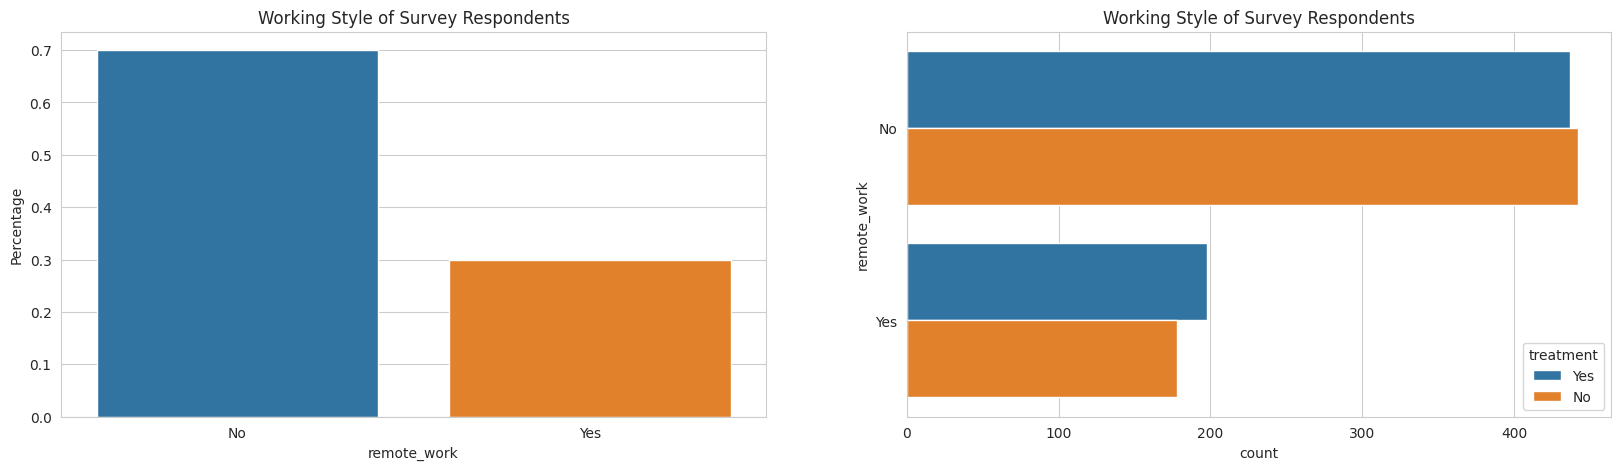

In [40]:
# Same comment as the previous ones. This will be the last comment for EDA
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = Df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = Df['remote_work'], hue = Df['treatment'])
plt.title('Working Style of Survey Respondents')
plt.show()

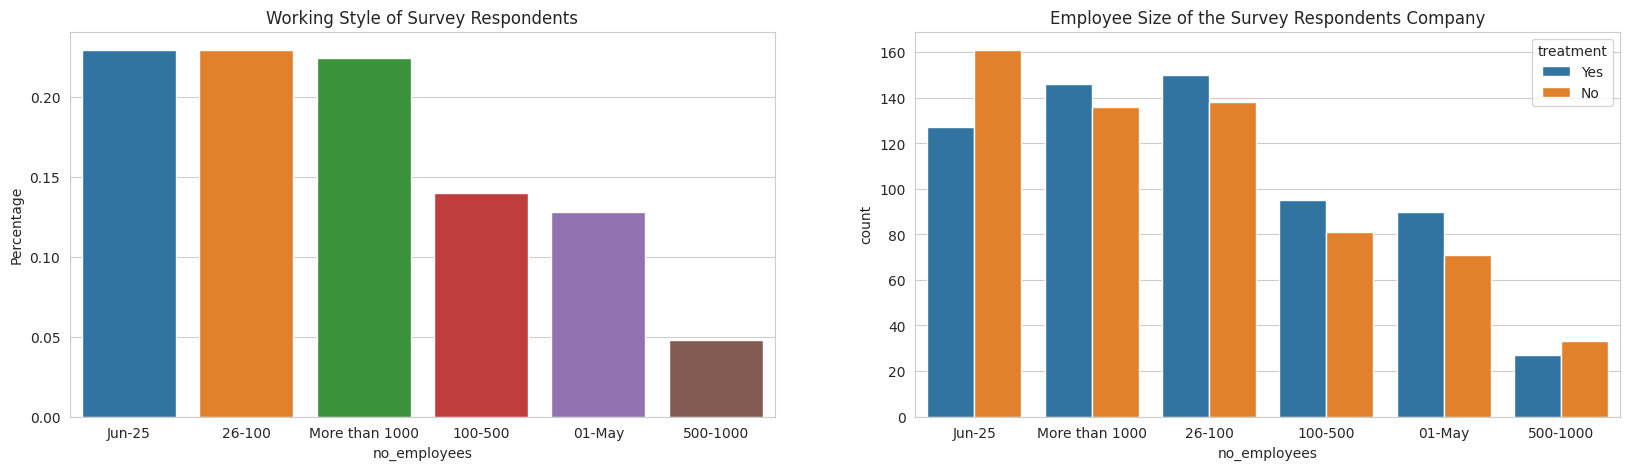

In [43]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = Df['no_employees'].value_counts(normalize = True).rename_axis('no_employees').reset_index(name = 'Percentage')
sns.barplot(x = 'no_employees', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = Df['no_employees'], hue = Df['treatment'])
plt.title('Employee Size of the Survey Respondents Company')
plt.show()

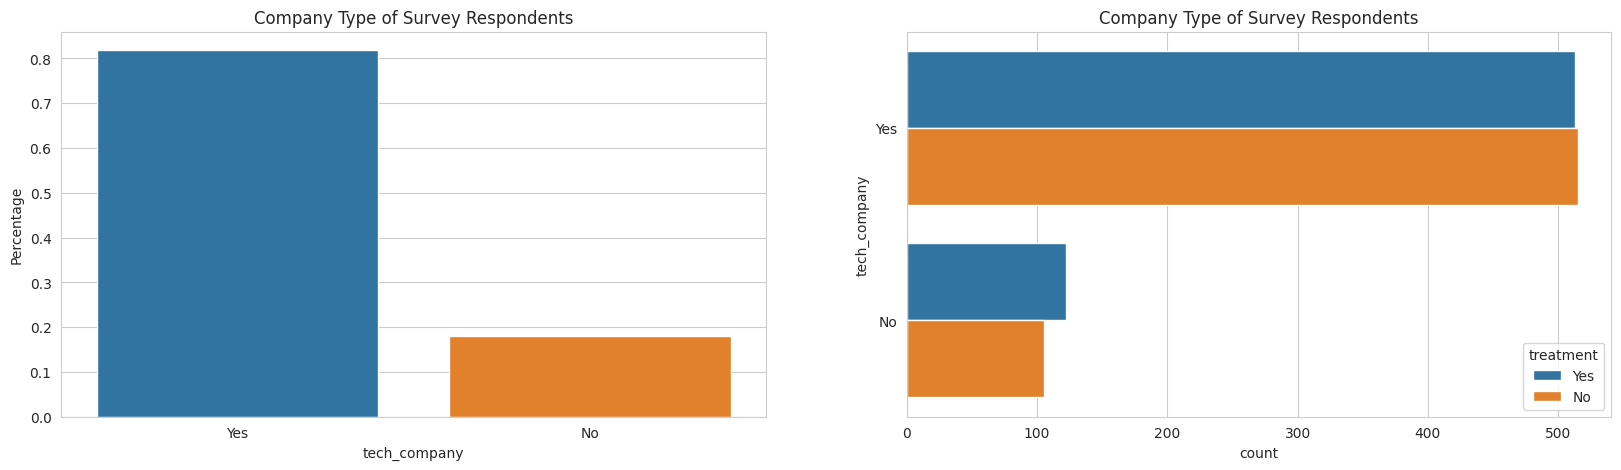

In [42]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = Df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage)
plt.title('Company Type of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = Df['tech_company'], hue = Df['treatment'])
plt.title('Company Type of Survey Respondents')
plt.show()

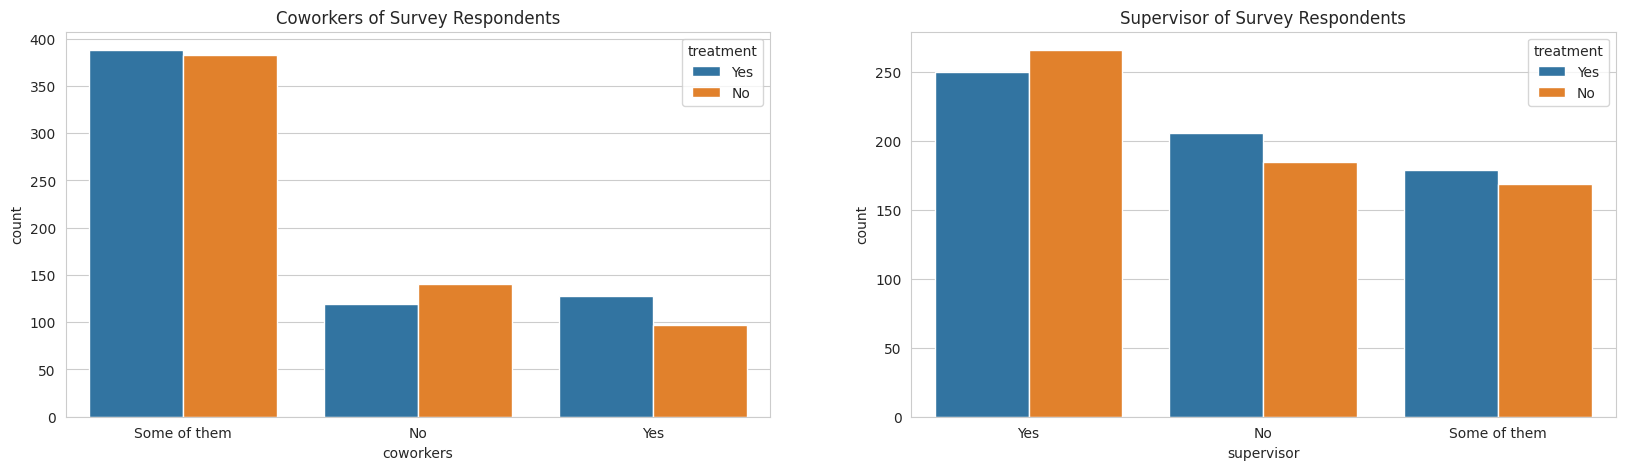

In [45]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = Df['coworkers'], hue = Df['treatment'])
plt.title('Coworkers of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = Df['supervisor'], hue = Df['treatment'])
plt.title('Supervisor of Survey Respondents')
plt.show()

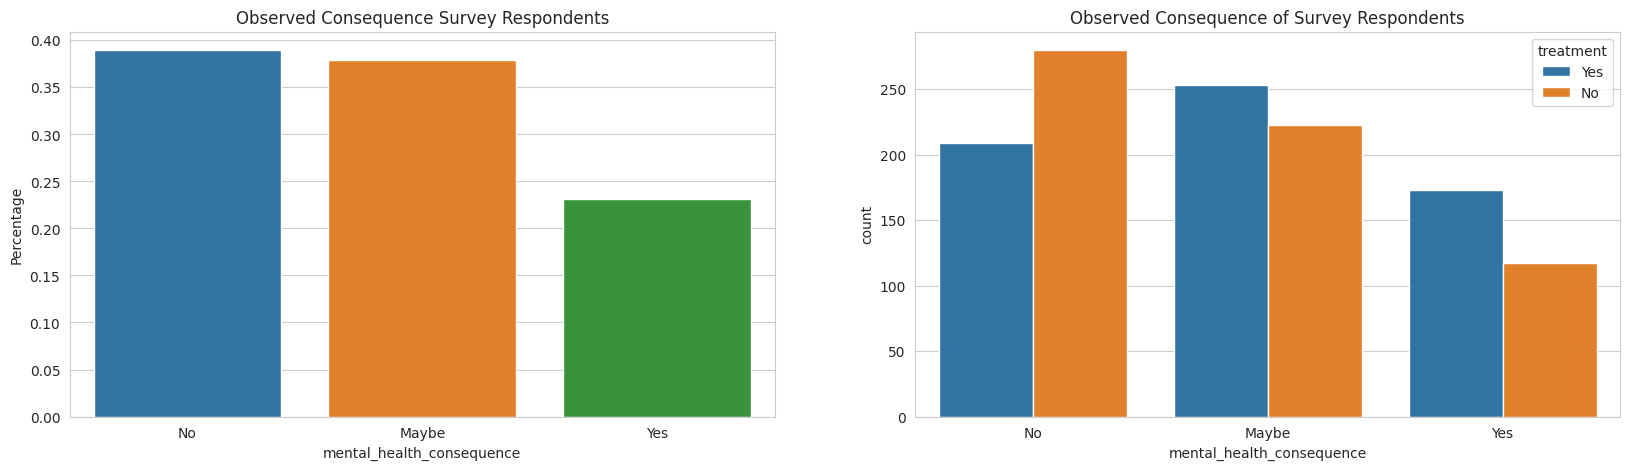

In [46]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = Df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage)
plt.title('Observed Consequence Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = Df['mental_health_consequence'], hue = Df['treatment'])
plt.title('Observed Consequence of Survey Respondents')
plt.show()

In [44]:
Df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

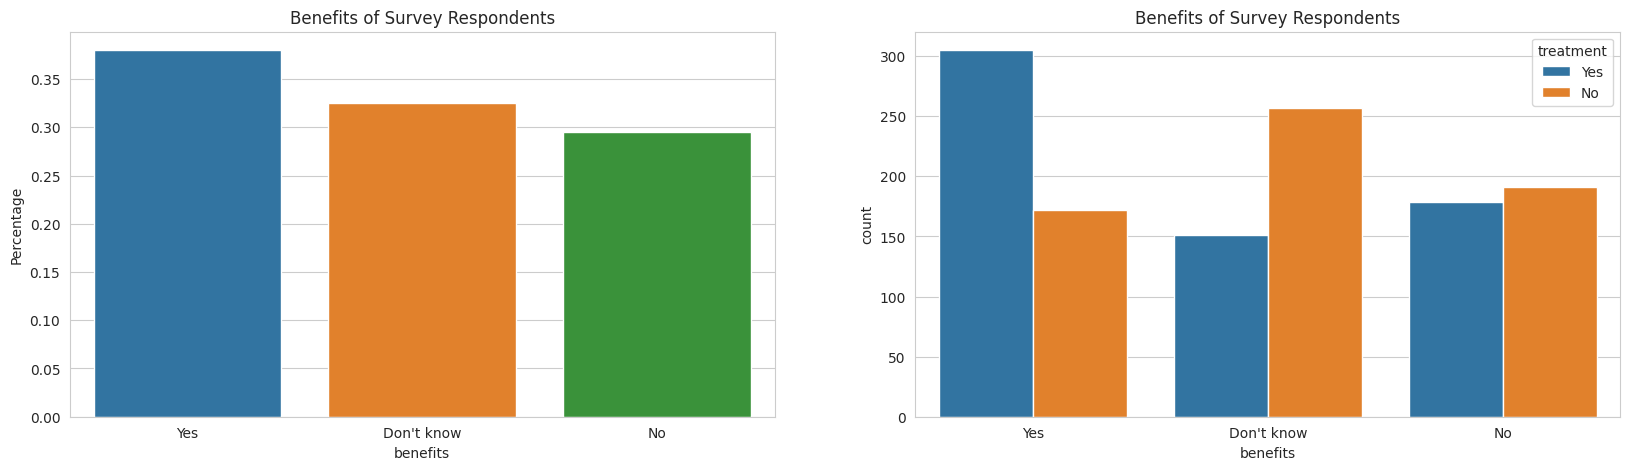

In [47]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = Df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage)
plt.title('Benefits of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = Df['benefits'], hue = Df['treatment'])
plt.title('Benefits of Survey Respondents')
plt.show()

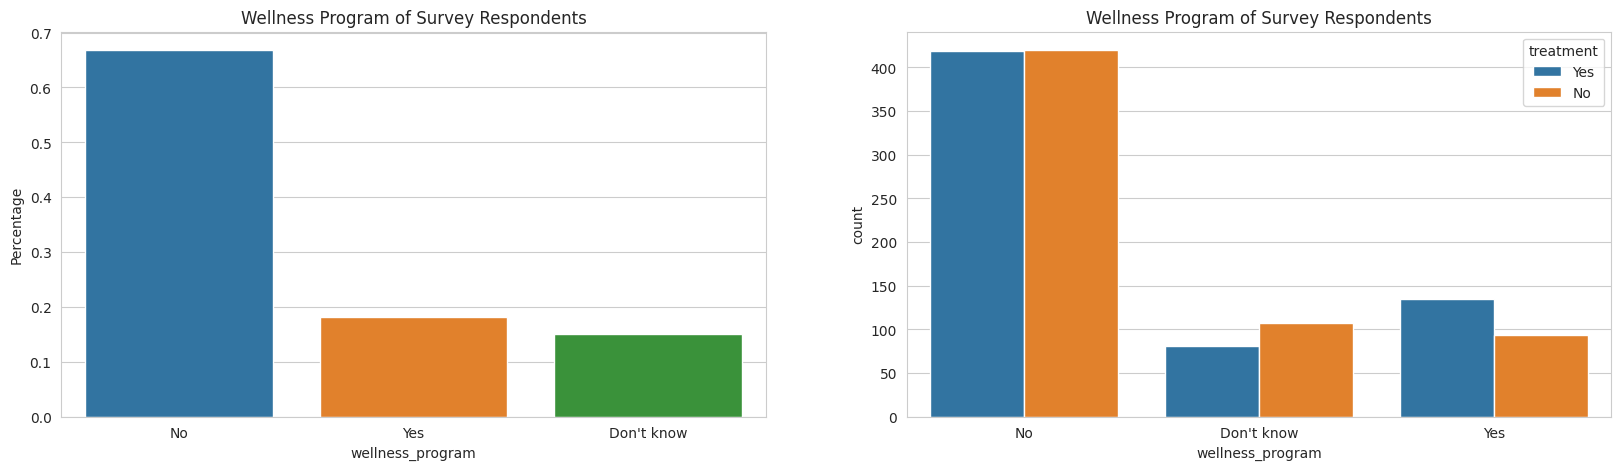

In [48]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = Df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage)
plt.title('Wellness Program of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = Df['wellness_program'], hue = Df['treatment'])
plt.title('Wellness Program of Survey Respondents')
plt.show()

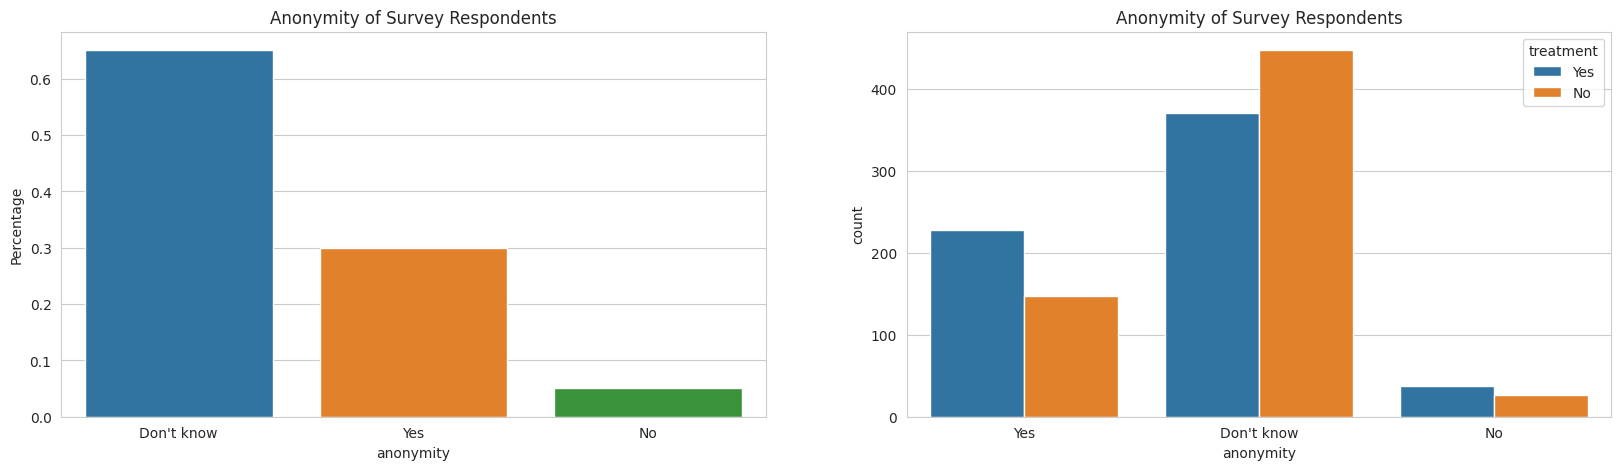

In [50]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = Df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage)
plt.title('Anonymity of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = Df['anonymity'], hue = Df['treatment'])
plt.title('Anonymity of Survey Respondents')
plt.show()

**Dashboard**